In [22]:
# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np 
from pathlib import Path 

%matplotlib inline

In [23]:
# Load CSV file
brewery_data_csv = Path("breweries_complete.csv")

In [24]:
# Read data file and store it in DataFrame
breweries_complete = pd.read_csv(brewery_data_csv, skipinitialspace=True)
breweries_complete.head()

,name,brewery_type,address_1,city,state_province,postal_code,longitude,latitude,state,zip_code,brewery_id
0,(405) Brewing Co,micro,1716 Topeka St,Norman,Oklahoma,73069-8224,-97.468182,35.257389,Oklahoma,73069,1
1,10 Barrel Brewing Co,large,1501 E St,San Diego,California,92101-6618,-117.129593,32.714813,California,92101,3
2,10 Barrel Brewing Co,large,62970 18th St,Bend,Oregon,97701-9847,-121.281706,44.086835,Oregon,97701,4
3,10 Barrel Brewing Co,large,1135 NW Galveston Ave Ste B,Bend,Oregon,97703-2465,-121.328802,44.057565,Oregon,97703,5
4,10 Barrel Brewing Co,large,1411 NW Flanders St,Portland,Oregon,97209-2620,-122.685506,45.525979,Oregon,97209,6


## Total breweries across all types per state

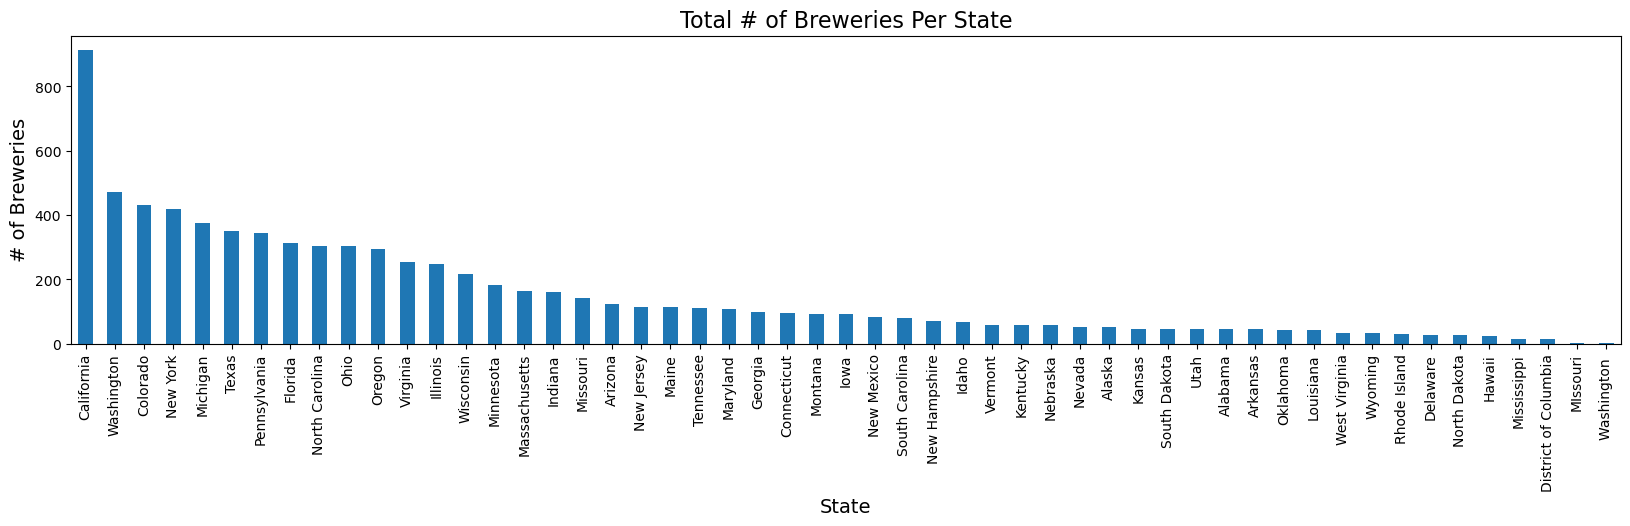

In [29]:
# Generate a bar plot showing total number of breweries by state 
brew_by_state = breweries_complete.groupby(["state"])["brewery_type"].count()
brew_by_state = brew_by_state.sort_values(ascending=False)
brew_by_state_df = pd.DataFrame(brew_by_state)

# Display bar plot, label x and y, apply formatting 
brew_chart = brew_by_state_df.plot(kind="bar", figsize=(20,4), legend=False)
brew_chart.set_title("Total # of Breweries Per State", fontsize=16)
brew_chart.set_xlabel("State", fontsize=14)
brew_chart.set_ylabel("# of Breweries", fontsize=14)

# Save an image of the chart and print it to the screen
plt.savefig("Images/breweries_per_state.png", bbox_inches="tight")
plt.show()

## Total "open"-type breweries per state

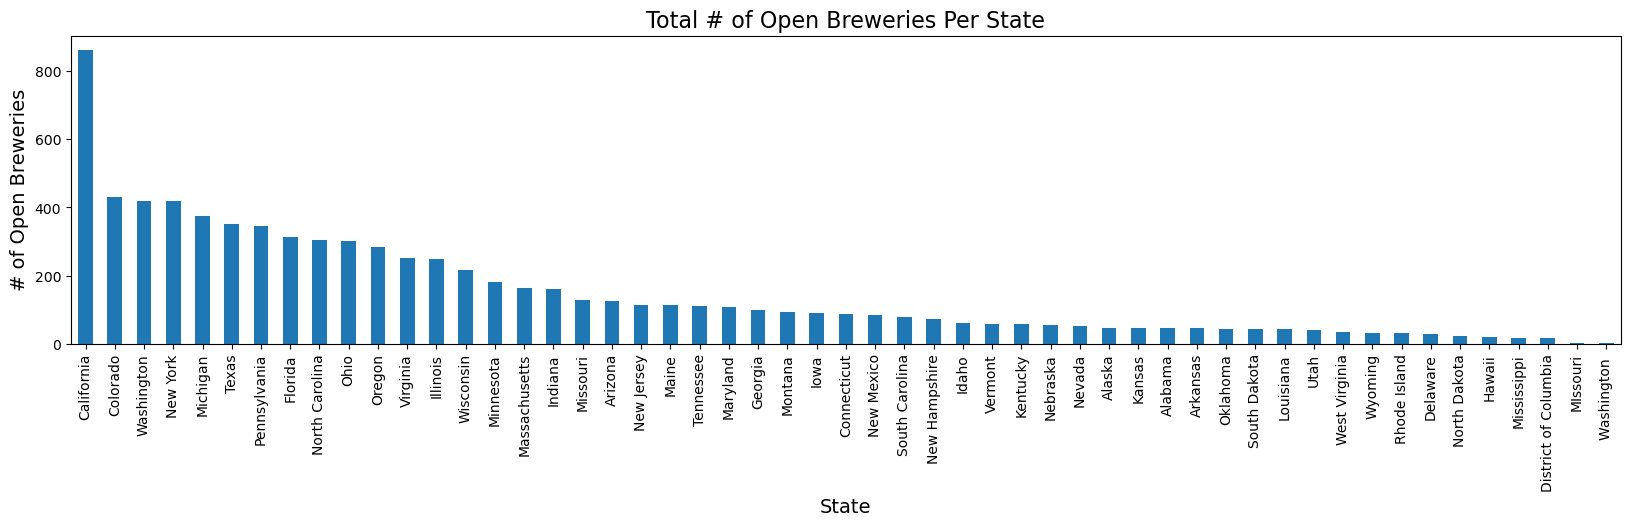

In [31]:
# Remove data of closed breweries 
open_breweries = breweries_complete[breweries_complete.brewery_type != "closed"]

# Generate a bar plot showing total number of open breweries by state 
open_brew_by_state = open_breweries.groupby(["state"])["brewery_type"].count()
open_brew_by_state = open_brew_by_state.sort_values(ascending=False)
open_breweries_df = pd.DataFrame(open_brew_by_state)

# Display bar plot, label x and y, apply formatting 
open_brew_chart = open_breweries_df.plot(kind="bar", figsize=(20,4), legend=False)
open_brew_chart.set_title("Total # of Open Breweries Per State", fontsize=16)
open_brew_chart.set_xlabel("State", fontsize=14)
open_brew_chart.set_ylabel("# of Open Breweries", fontsize=14)

# Save an image of the chart and print it to the screen
plt.savefig("Images/open_breweries_per_state.png", bbox_inches="tight")
plt.show()

## Total closed breweries per state

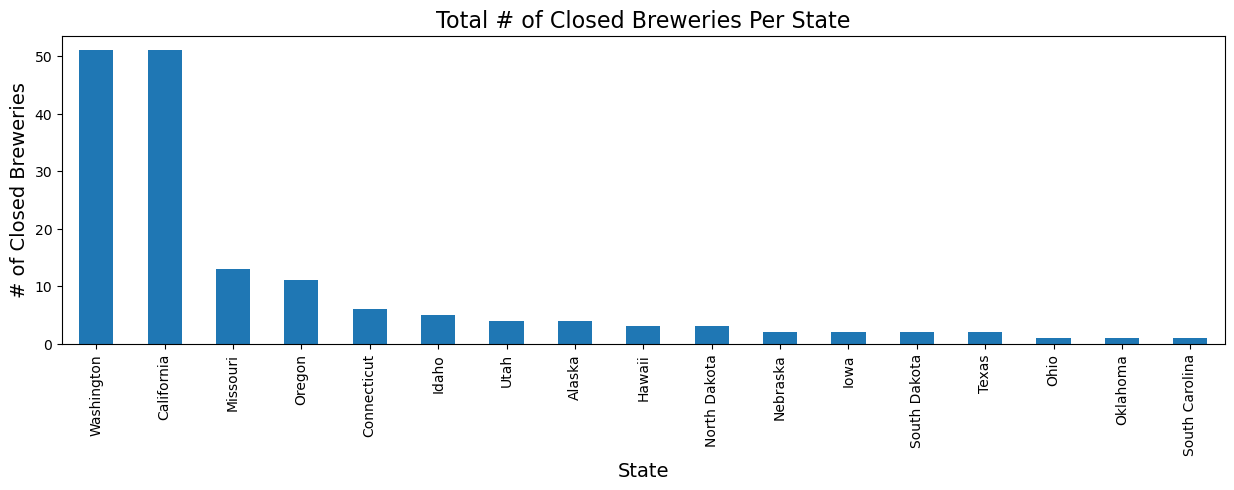

In [34]:
# Pull data for closed breweries 
closed_breweries = breweries_complete.loc[breweries_complete["brewery_type"] == "closed"]

# Generate a bar plot showing total number of closed breweries by state 
closed_brew_by_state = closed_breweries.groupby(["state"])["brewery_type"].count()
closed_brew_by_state = closed_brew_by_state.sort_values(ascending=False)
closed_breweries_df = pd.DataFrame(closed_brew_by_state)

# Display bar plot, label x and y, apply formatting 
closed_brew_chart = closed_breweries_df.plot(kind="bar", figsize=(15,4), legend=False)
closed_brew_chart.set_title("Total # of Closed Breweries Per State", fontsize=16)
closed_brew_chart.set_xlabel("State", fontsize=14)
closed_brew_chart.set_ylabel("# of Closed Breweries", fontsize=14)

# Save an image of the chart and print it to the screen
plt.savefig("Images/closed_breweries_per_state.png", bbox_inches="tight")
plt.show()

## Total planned breweries per state

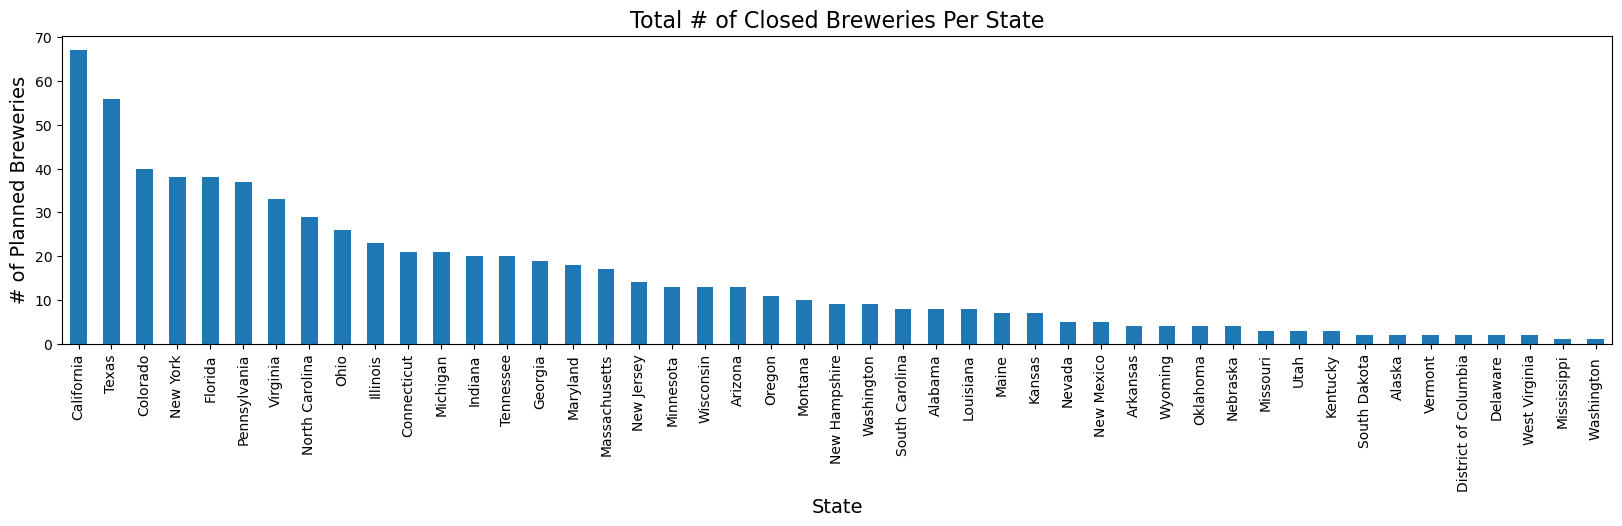

In [36]:
# Pull data for planned breweries
planned_breweries = breweries_complete.loc[breweries_complete["brewery_type"] == "planning"]

# Generate a bar plot showing total number of closed breweries by state 
planned_brew_by_state = planned_breweries.groupby(["state"])["brewery_type"].count()
planned_brew_by_state = planned_brew_by_state.sort_values(ascending=False)
planned_breweries_df = pd.DataFrame(planned_brew_by_state)

# Display bar plot, label x and y, apply formatting 
planned_brew_chart = planned_breweries_df.plot(kind="bar", figsize=(20,4), legend=False)
planned_brew_chart.set_title("Total # of Closed Breweries Per State", fontsize=16)
planned_brew_chart.set_xlabel("State", fontsize=14)
planned_brew_chart.set_ylabel("# of Planned Breweries", fontsize=14)

# Save an image of the chart and print it to the screen
plt.savefig("Images/planned_breweries_per_state.png", bbox_inches="tight")
plt.show()

## Stacked bar plot of brewery-types (no closed) per state

In [9]:
# Identify number of closed breweries in comparison to other types 
breweries_complete["brewery_type"].value_counts()

micro         4114
brewpub       2395
planning       702
regional       213
contract       196
closed         162
large           74
proprietor      69
nano             5
bar              2
Name: brewery_type, dtype: int64

In [40]:
# Drop closed breweries from dataset 
open_planned_breweries = breweries_complete[breweries_complete.brewery_type != "closed"]

# Output csv of only open or planned breweries  
open_planned_breweries.to_csv("breweries_open_planned.csv", index=False)
open_planned_breweries

,name,brewery_type,address_1,city,state_province,postal_code,longitude,latitude,state,zip_code,brewery_id
0,(405) Brewing Co,micro,1716 Topeka St,Norman,Oklahoma,73069-8224,-97.468182,35.257389,Oklahoma,73069,1
1,10 Barrel Brewing Co,large,1501 E St,San Diego,California,92101-6618,-117.129593,32.714813,California,92101,3
2,10 Barrel Brewing Co,large,62970 18th St,Bend,Oregon,97701-9847,-121.281706,44.086835,Oregon,97701,4
3,10 Barrel Brewing Co,large,1135 NW Galveston Ave Ste B,Bend,Oregon,97703-2465,-121.328802,44.057565,Oregon,97703,5
4,10 Barrel Brewing Co,large,1411 NW Flanders St,Portland,Oregon,97209-2620,-122.685506,45.525979,Oregon,97209,6
...,...,...,...,...,...,...,...,...,...,...,...
7927,Zebulon Artisan Ales,micro,8 Merchents Alley,Weaverville,North Carolina,28787-8860,-82.554475,35.715670,North Carolina,28787,7914
7928,Zephyr Brewing Co,micro,1609 E 58th Ave Ste G,Denver,Colorado,80216-1528,-104.981909,39.779835,Colorado,80216,7916
7929,Zero Gravity Craft Brewery,micro,716 Pinte Street,Burlington,Vermont,05401,-73.211024,44.474836,Vermont,05401,7918
7930,Zum Bier,micro,3232 E Monroe St,Waukegan,Illinois,60085,-87.861975,42.358933,Illinois,60085,7930


In [43]:
# Using code from team member Natalia Lopez 
open_planned_by_state = open_planned_breweries.groupby(["state", "brewery_type"])["brewery_type"].count()
open_planned_by_state

state    brewery_type
Alabama  brewpub          4
         contract         1
         micro           32
         planning         8
Alaska   brewpub         14
                         ..
Wyoming  brewpub         12
         contract         1
         micro           14
         planning         4
         regional         1
Name: brewery_type, Length: 283, dtype: int64

In [47]:
open_planned_by_state_index = open_brew_by_state.index
open_planned_by_state_index

Index(['California', 'Colorado', 'Washington', 'New York', 'Michigan', 'Texas',
       'Pennsylvania', 'Florida', 'North Carolina', 'Ohio', 'Oregon',
       'Virginia', 'Illinois', 'Wisconsin', 'Minnesota', 'Massachusetts',
       'Indiana', 'Missouri', 'Arizona', 'New Jersey', 'Maine', 'Tennessee',
       'Maryland', 'Georgia', 'Montana', 'Iowa', 'Connecticut', 'New Mexico',
       'South Carolina', 'New Hampshire', 'Idaho', 'Vermont', 'Kentucky',
       'Nebraska', 'Nevada', 'Alaska', 'Kansas', 'Alabama', 'Arkansas',
       'Oklahoma', 'South Dakota', 'Louisiana', 'Utah', 'West Virginia',
       'Wyoming', 'Rhode Island', 'Delaware', 'North Dakota', 'Hawaii',
       'Mississippi', 'District of Columbia', 'MIssouri', 'Washington '],
      dtype='object', name='state')

In [45]:
open_planned_by_state_index2 = open_brew_by_state.unstack()
open_planned_by_state_index2

ValueError: index must be a MultiIndex to unstack, <class 'pandas.core.indexes.base.Index'> was passed

In [42]:
table_df = pd.read_csv("breweries_open_planned.csv", skipinitialspace=True)
table_df["value"]=1
pivot_table = table_df.pivot_table(index=["state"], columns=["brewery_type"], fill_value=0, aggfunc="sum") 
pivot_table

C:\Users\adh1053\AppData\Local\Temp\ipykernel_26836\3970751780.py:3: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  pivot_table = table_df.pivot_table(index=["state"], columns=["brewery_type"], fill_value=0, aggfunc="sum")


brewery_id                                          \
brewery_type                bar  brewpub contract  large    micro  nano   
state                                                                     
Alabama                       0    12709     3293      0   119255     0   
Alaska                        0    56807     3637      0    90408     0   
Arizona                       0   206191    12172   5635   208774     0   
Arkansas                      0    70651     5641      0    73999     0   
California                    0  1064784   110896  29518  1748737     0   
Colorado                      0   533334    36905  15606   883462     0   
Connecticut                   0    43454     9400      0   173835     0   
Delaware                      0    43162        0   2770    36723     0   
District of Columbia          0    22337     1763      0    10407     0   
Florida                       0   302168    22762  13713   703290     0   
Georgia                       0   108587     7573  11935   221729     0   
Hawaii                        0    50597        0      0    28811     0   
Idaho                         0   108851     1115      8   146316     0   
Illinois                      0   325171    45928  15989   468546     0   
Indiana                       0   302433    11821      0   237190     0   
Iowa                          0   111521     2316      0   203368     0   
Kansas                        0    66996        0      0    88843     0   
Kentucky                      0    41663     6654      0   134967     0   
Louisiana                     0    25624     4431      0   111292     0   
MIssouri                      0        0        0      0     6153     0   
Maine                         0   118393     5230      0   267432     0   
Maryland                      0    88970    22395   3273   212290     0   
Massachusetts                 0   135282    35130      0   328898     0   
Michigan                      0   785222     1936      0   566631     0   
Minnesota                     0   181936    20192      0   385090     0   
Mississippi                   0     5935     7165      0    49613     0   
Missouri                      0   150272     3229    350   268107     0   
Montana                       0    62552     7001      0   218911     0   
Nebraska                      0    77822        0      0   118716     0   
Nevada                     4542    85678    14426      0    84749     0   
New Hampshire                 0    92016     4778    359   138384     0   
New Jersey                    0    61900     6190    360   292702     0   
New Mexico                    0   196782     2070      0    99144     0   
New York                      0   429739    97525   9523   930187     0   
North Carolina                0   295389    20107  30994   711185     0   
North Dakota               2882    38536        0      0    29933  6669   
Ohio                          0   415763    33203   5037   699868     0   
Oklahoma                      0    13544    11160      0   110225     0   
Oregon                        0   423417     8622   7155   565820     0   
Pennsylvania                  0   648186    22214      0   490365     0   
Rhode Island                  0    41906        0      0    99672     0   
South Carolina                0   115488     2586      0   166270     0   
South Dakota                  0    67144     4142      0    88180     0   
Tennessee                     0    98592     3883      0   238556     0   
Texas                         0   330767    35895  14784   750860     0   
Utah                          0    73551        0      0   104615     0   
Vermont                       0    75301        0      0   129630     0   
Virginia                      0   215573    16849   9950   609440     0   
Washington                    0   464817    23854   7365  1118764  1460   
Washington                    0        0        0      0        0     0   
West Virginia                 0    46181      

In [18]:
# Output list of breweries with closed ones removed 
# open_planned_breweries.to_csv("breweries_open_planned.csv", index=False)

In [19]:
# Load CSV file
# open_planned_brewery_data_csv = Path("breweries_open_planned.csv")

In [20]:
# Read data file and store it in DataFrame
# open_planned_brew_data = pd.read_csv(open_planned_brewery_data_csv)
# open_planned_brew_data

In [21]:
# Loop through rows of open_planned brewery data to confirm removal of 162 closed breweries 
#rowcount  = 0
# iterating through the whole file
#for row in open("breweries_open_planned.csv"):
  #rowcount+= 1
# printing the result
#print("Number of rows:", rowcount -1)

In [15]:
open_planned_df = open_planned_brew_data[open_planned_brew_data.columns[~open_planned_brew_data.columns.isin(["name", "address_1", "city", "state_province", "postal_code", "longitude", "latitude", "zip_code", "brewery_id"])]]

# Output list of breweries with closed ones removed 
open_planned_df.to_csv("breweries_open_planned_by_state.csv", index=False)
open_planned_df

,brewery_type
0,4114
1,2395
2,702
3,213
4,196
5,74
6,69
7,5
8,2


In [16]:
#live_brew_df = pd.DataFrame(open_planned_breweries)
#live_brew_reset = live_brew_df.reset_index()
#live_brew_reset

In [17]:
table_df = pd.read_csv("breweries_open_planned_by_state.csv", skipinitialspace=True)
table_df["value"]=1
pivot_table = table_df.pivot_table(index=["state"], columns=["brewery_type"], fill_value=0, aggfunc="sum")
#margins=True, margins_name="Total"

#pivot_table = table_df.pivot_table(index=["state"], columns=["brewery_type"], values=["value"], fill_value=0, aggfunc=lambda x: ' '.join(str(v) for v in x))
pivot_table

KeyError: 'state'

In [ ]:
# pivot_table.sort_values(by=["Total"], axis=1, ascending=False)


In [ ]:
#bar_plot_data = pivot_table.groupby(["state"])["brewery_type"].count()
#bar_plot_data = pivot_table.sort_values(by=["values"], ascending=False)
#bar_plot_df = pd.DataFrame(bar_plot_data)

# Display bar plot, label x and y, apply formatting 
#stacked_bar_plot = pivot_table.plot(kind="bar", figsize=(20,7), stacked=True)
#stacked_bar_plot.set_xlabel("State", fontsize=18)
#stacked_bar_plot.set_ylabel("# of Planned Breweries", fontsize=18)

In [ ]:
#pivot_table = pivot_table.sort_values(ascending=False)
# stacked_bar_plot = pivot_table.plot(kind="bar", stacked=True)
#plt.title("Types of Breweries Per State")
#plt.xlabel("States")
#plt.ylabel("Total # of Breweries by Type")


In [ ]:
#table_df = pd.read_csv("breweries_open_planned_by_state.csv")
#pivot_table = table_df.pivot_table(index=["state"], columns=["brewery_type"], values=["brewery_type"], aggfunc=lambda x: ' '.join(str(v) for v in x))
#pivot_table

In [ ]:
#table = pd.pivot_table(open_planned_df, values="brewery_type", index="", columns="brewery_types", aggfunc=np.sum)

In [ ]:
#micro_brew = open_planned_brew_data.iloc["brewery_type" == "micro"]

In [ ]:
#micro_brew = open_planned_brew_data.groupby(["brewery_type"])["state_province"].value_counts()